In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df1 = pd.read_csv(r"Heart rate data set\heart1.csv")
df2 = pd.read_csv(r"Heart rate data set\heart2.csv")

In [4]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df2 = df2.drop(columns=['caa', 'thall'])

In [8]:
df2.columns = ("Age", "Sex", "ChestPainType", "RestingBP", 
               "Cholesterol", "FastingBS", "RestingECG", "MaxHR", 
               "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease")

In [9]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    int64  
 2   ChestPainType   303 non-null    int64  
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    int64  
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    int64  
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    int64  
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


In [11]:
sex_map = {1: 'M', 0: 'F'}
chest_pain_map = {0: 'TA', 1: 'ATA', 2: 'NAP', 3: 'ASY'}
exercise_angina_map = {1: 'Y', 0: 'N'}
st_slope_map = {0: 'Up', 1: 'Flat', 2: 'Down'}

In [12]:
df2['Sex'] = df2['Sex'].map(sex_map)
df2['ChestPainType'] = df2['ChestPainType'].map(chest_pain_map)
df2['ExerciseAngina'] = df2['ExerciseAngina'].map(exercise_angina_map)
df2['ST_Slope'] = df2['ST_Slope'].map(st_slope_map)

In [13]:
resting_ecg_map = {0: 'Normal', 1: 'ST', 2: 'LVH'}
df2['RestingECG'] = df2['RestingECG'].map(resting_ecg_map)

In [14]:
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ASY,145,233,1,Normal,150,N,2.3,Up,1
1,37,M,NAP,130,250,0,ST,187,N,3.5,Up,1
2,41,F,ATA,130,204,0,Normal,172,N,1.4,Down,1
3,56,M,ATA,120,236,0,ST,178,N,0.8,Down,1
4,57,F,TA,120,354,0,ST,163,Y,0.6,Down,1


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             303 non-null    int64  
 1   Sex             303 non-null    object 
 2   ChestPainType   303 non-null    object 
 3   RestingBP       303 non-null    int64  
 4   Cholesterol     303 non-null    int64  
 5   FastingBS       303 non-null    int64  
 6   RestingECG      303 non-null    object 
 7   MaxHR           303 non-null    int64  
 8   ExerciseAngina  303 non-null    object 
 9   Oldpeak         303 non-null    float64
 10  ST_Slope        303 non-null    object 
 11  HeartDisease    303 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 28.5+ KB


In [16]:
df = pd.concat([df1, df2], ignore_index=True)

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1216,57,F,TA,140,241,0,ST,123,Y,0.2,Flat,0
1217,45,M,ASY,110,264,0,ST,132,N,1.2,Flat,0
1218,68,M,TA,144,193,1,ST,141,N,3.4,Flat,0
1219,57,M,TA,130,131,0,ST,115,Y,1.2,Flat,0


In [18]:
df.to_csv(r'Heart rate data set\combined.csv')

In [19]:
#Understanding the Dataset

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [22]:
df.shape

(1221, 12)

In [23]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1221 non-null   int64  
 1   Sex             1221 non-null   object 
 2   ChestPainType   1221 non-null   object 
 3   RestingBP       1221 non-null   int64  
 4   Cholesterol     1221 non-null   int64  
 5   FastingBS       1221 non-null   int64  
 6   RestingECG      1221 non-null   object 
 7   MaxHR           1221 non-null   int64  
 8   ExerciseAngina  1221 non-null   object 
 9   Oldpeak         1221 non-null   float64
 10  ST_Slope        1221 non-null   object 
 11  HeartDisease    1221 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 114.6+ KB


In [25]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1221.000000,1221.00000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,53.723178,132.20475,210.578215,0.212121,139.995086,0.925143,0.551188
std,9.350481,18.27277,100.394018,0.408978,25.453461,1.092282,0.497577
min,28.000000,0.00000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.00000,188.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.00000,228.000000,0.000000,141.000000,0.600000,1.000000
75%,60.000000,140.00000,269.000000,0.000000,160.000000,1.600000,1.000000
max,77.000000,200.00000,603.000000,1.000000,202.000000,6.200000,1.000000


In [26]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259188,-0.044116,0.177196,-0.367371,0.247530,0.159140
RestingBP,0.259188,1.000000,0.095093,0.093665,-0.099388,0.170251,0.047528
Cholesterol,-0.044116,0.095093,1.000000,-0.237858,0.236536,0.059736,-0.203026
FastingBS,0.177196,0.093665,-0.237858,1.000000,-0.123364,0.035941,0.202372
MaxHR,-0.367371,-0.099388,0.236536,-0.123364,1.000000,-0.186343,-0.208441
Oldpeak,0.247530,0.170251,0.059736,0.035941,-0.186343,1.000000,0.182303
HeartDisease,0.159140,0.047528,-0.203026,0.202372,-0.208441,0.182303,1.000000


In [27]:
#Data Cleaning Process

In [28]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [29]:
df.duplicated().sum()

1

In [30]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

In [107]:
outlier_columns = []
outlier_dict = {}

In [77]:
from pandas.api.types import is_numeric_dtype

In [109]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
    
        lb=Q1-1.5*IQR
        up=Q3+1.5*IQR
    
        outlier = df[ (df[column]<lb) | (df[column]>up) ]
    
        if not outlier.empty:
            outlier_columns.append(column)
            c = outlier[column].count()
            outlier_dict[column] = c

In [111]:
outlier_columns

['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [113]:
outlier_dict

{'RestingBP': 37,
 'Cholesterol': 194,
 'FastingBS': 259,
 'MaxHR': 2,
 'Oldpeak': 12}

In [119]:
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR

    if outlier_dict[column] > 100:
        df[column] = np.where(df[column] < lb, lb, df[column])
        df[column] = np.where(df[column] > up, up, df[column])
    else:
        df = df[~((df[column] < lb) | (df[column] > up))]

In [121]:
#Exploratory Data Analysis

In [125]:
import matplotlib.pyplot as plt

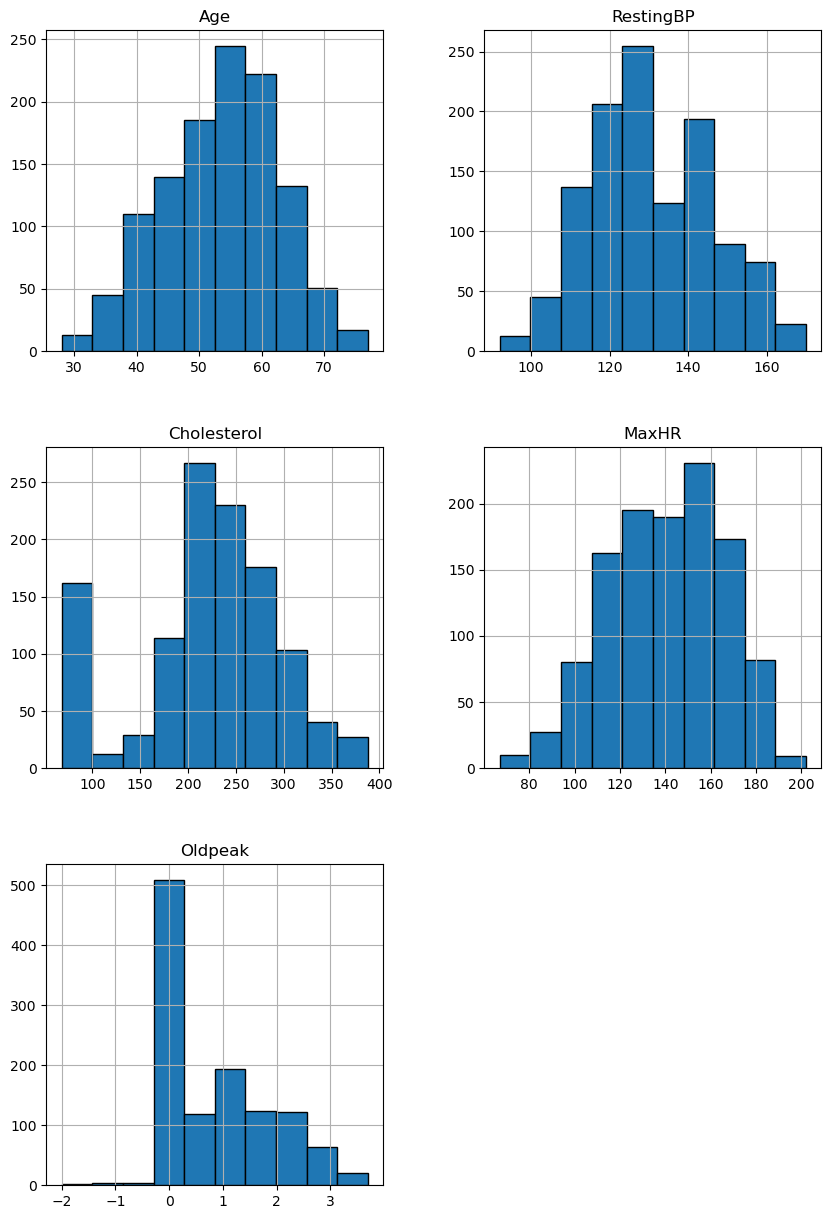

In [153]:
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].hist(edgecolor='black', figsize=(10,15))
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

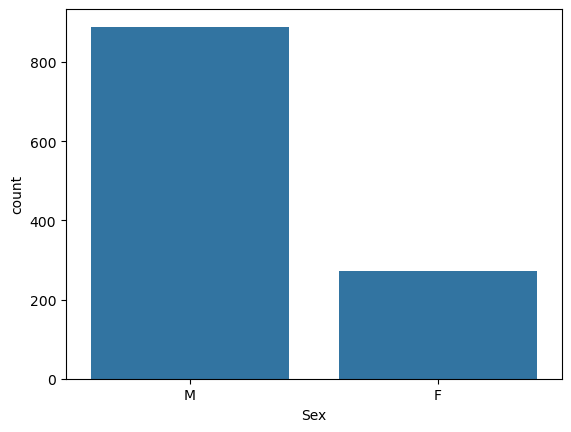

In [175]:
sns.countplot(data=df, x="Sex")

<Axes: xlabel='HeartDisease', ylabel='count'>

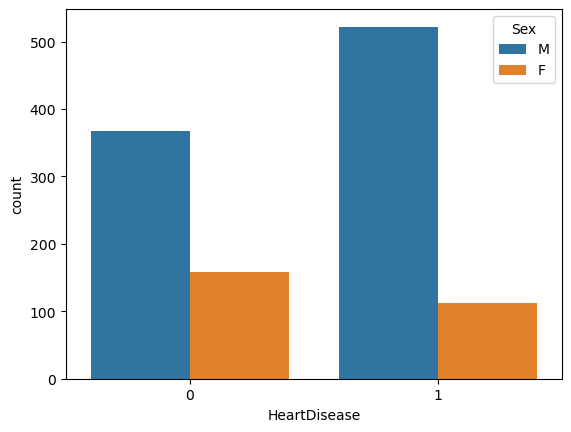

In [185]:
sns.countplot(x='HeartDisease',hue='Sex', data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

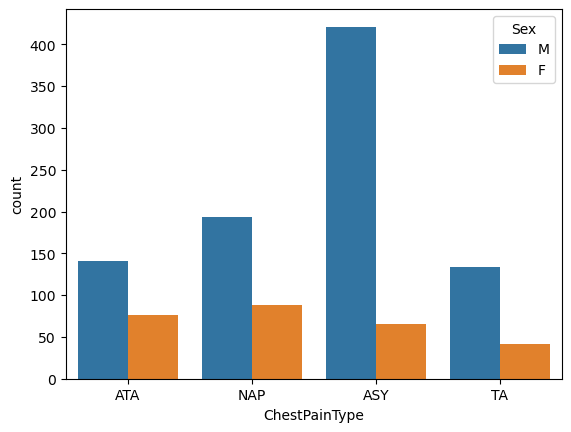

In [167]:
sns.countplot(x='ChestPainType', hue='Sex', data=df)

<Axes: xlabel='ChestPainType', ylabel='count'>

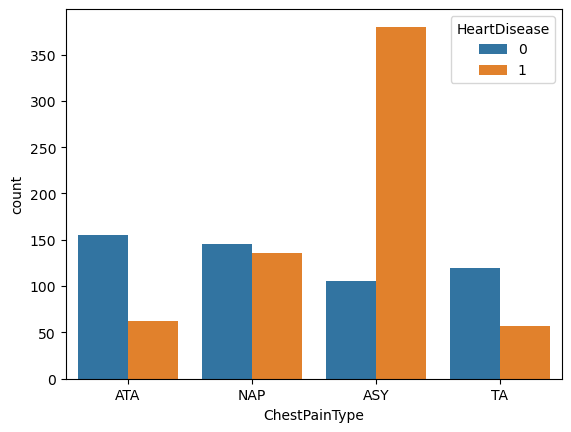

In [187]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)

<Axes: xlabel='HeartDisease', ylabel='count'>

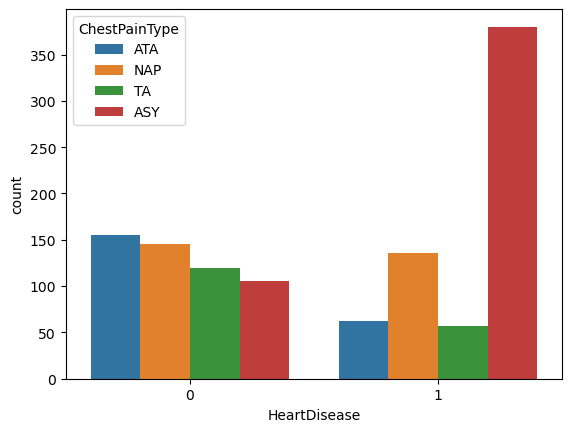

In [189]:
sns.countplot(hue='ChestPainType', x='HeartDisease', data=df)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

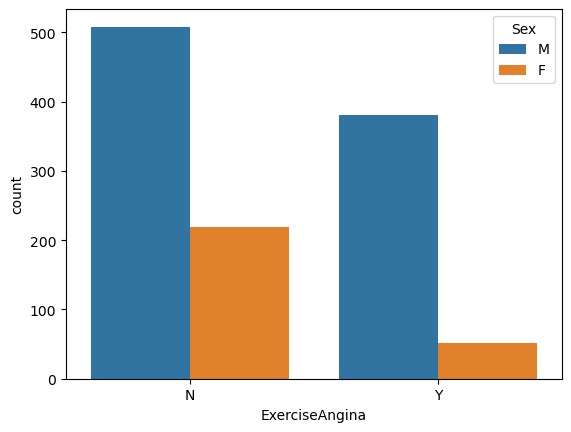

In [181]:
sns.countplot(x='ExerciseAngina',hue='Sex', data=df)

<Axes: xlabel='RestingECG', ylabel='count'>

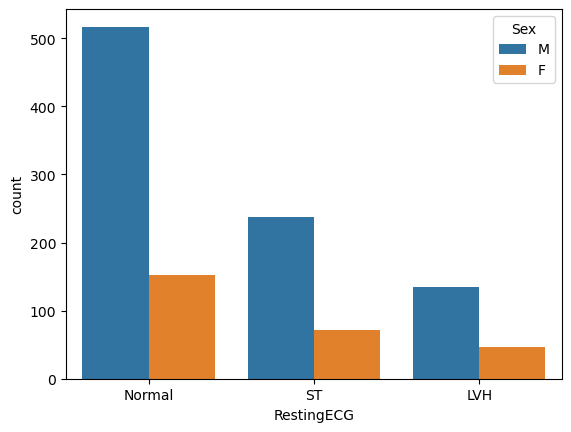

In [183]:
sns.countplot(x='RestingECG',hue='Sex', data=df)

<Axes: xlabel='ST_Slope', ylabel='count'>

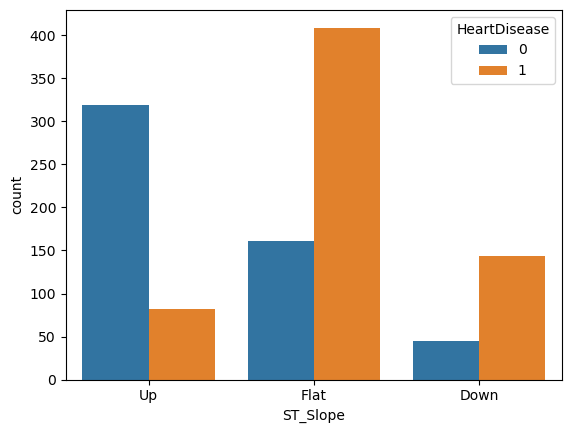

In [193]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)